In [292]:
import numpy as np
import pandas as pd
import numpy.random as npr

In [293]:
cd C:/Project CPC152

C:\Project CPC152


In [294]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Understanding the data

In [295]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [296]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [297]:
iris.shape

(150, 6)

In [298]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Cleaning Data

In [299]:
iris.apply(lambda x: sum(x.isnull()), axis = 0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Change the data type from string to numeric using Encoder

In [300]:
pd.options.mode.chained_assignment = None

In [301]:
data = iris.iloc[:,1:]

In [302]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

## Feature Importance

In [303]:
x = iris.iloc[:, 1:-1]
y = iris.iloc[:, -1]

In [304]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.09170189 0.0611577  0.37792546 0.46921495]


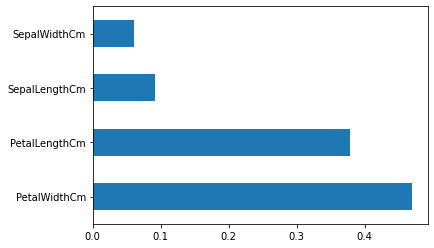

In [305]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [306]:
import pandas as pd
import numpy as np
import seaborn as sns

In [307]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

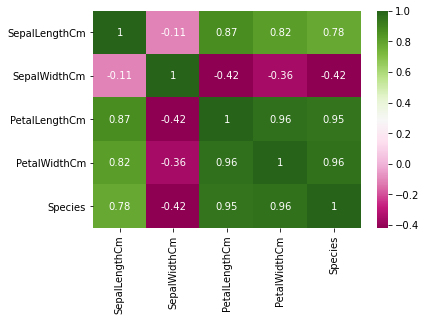

In [308]:
g=sns.heatmap(data.corr(),annot=True,cmap="PiYG")
plt.show()

## Spliting the Dataset

In [309]:
x = iris.iloc[:, 1:-1]
y = iris.iloc[:, -1]

In [310]:
print(x.shape)

(150, 4)


In [311]:
print(y.shape)


(150,)


In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=4)

In [313]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [314]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


In [315]:
print(X_train1.shape)
print(X_test1.shape)

(120, 4)
(30, 4)


In [316]:
print(y_train1.shape)
print(y_test1.shape)

(120,)
(30,)


## Predictions

In [317]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,31,2)
scores = {}
scores_list = []
error_rate = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    error_rate.append(np.mean(y_pred != y_test))

In [318]:
scores

{1: 0.9555555555555556,
 3: 0.9777777777777777,
 5: 0.9777777777777777,
 7: 0.9777777777777777,
 9: 0.9777777777777777,
 11: 0.9777777777777777,
 13: 0.9777777777777777,
 15: 0.9777777777777777,
 17: 0.9777777777777777,
 19: 0.9777777777777777,
 21: 0.9777777777777777,
 23: 0.9777777777777777,
 25: 0.9777777777777777,
 27: 0.9777777777777777,
 29: 0.9555555555555556}

In [319]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,31,2)
scores1 = {}
scores_list1 = []
error_rate1 = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train1,y_train1)
    y_pred1 = knn1.predict(X_test1)
    scores1[k] = metrics.accuracy_score(y_test1, y_pred1)
    scores_list1.append(metrics.accuracy_score(y_test1, y_pred1))
    error_rate1.append(np.mean(y_pred1 != y_test1))

In [320]:
scores1

{1: 0.9333333333333333,
 3: 0.9666666666666667,
 5: 0.9666666666666667,
 7: 0.9666666666666667,
 9: 0.9666666666666667,
 11: 0.9666666666666667,
 13: 0.9666666666666667,
 15: 0.9666666666666667,
 17: 0.9666666666666667,
 19: 0.9666666666666667,
 21: 0.9666666666666667,
 23: 0.9666666666666667,
 25: 0.9666666666666667,
 27: 0.9666666666666667,
 29: 0.9333333333333333}

Text(0, 0.5, 'Testing Accuracy')

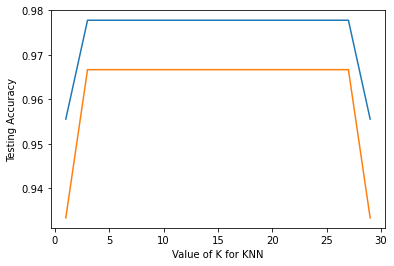

In [321]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores_list) 
plt.plot(k_range, scores_list1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, '‘Error Rate’')

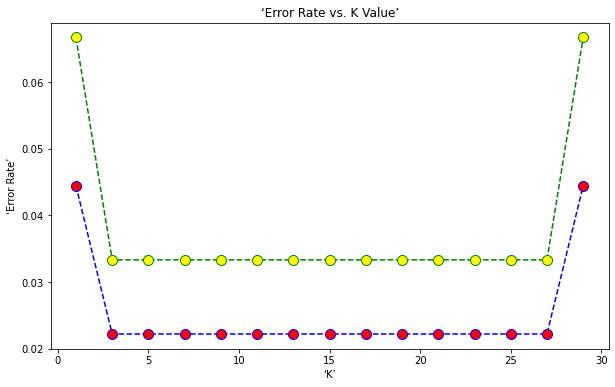

In [322]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(k_range,error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(k_range,error_rate1,color='green', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('‘Error Rate vs. K Value’')
plt.xlabel('‘K’')
plt.ylabel('‘Error Rate’')

## When K=3


In [323]:
model = KNeighborsClassifier(n_neighbors=3) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [324]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=3)

In [325]:
predictions = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [326]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8222222222222222
Recall    :  0.8222222222222222
Precision :  0.8296296296296297
Confusion matrix: 
[[21  0  0]
 [ 0  7  3]
 [ 0  5  9]]


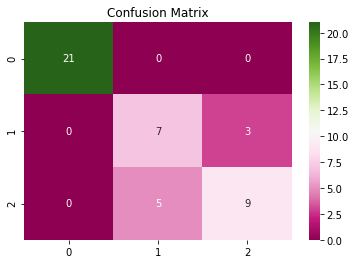

In [327]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [328]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=3)

In [329]:
predictions = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [330]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9555555555555556
Recall    :  0.9555555555555556
Precision :  0.9555555555555556
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]


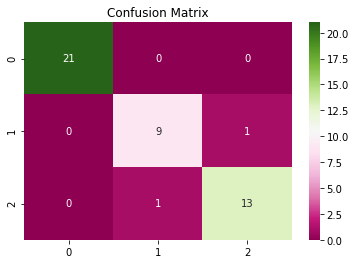

In [331]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [332]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=3)

In [333]:
predictions = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [334]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


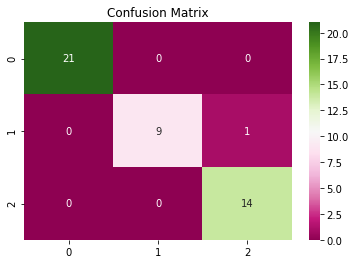

In [335]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [336]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=3)

In [337]:
predictions = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [338]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8666666666666667
Recall    :  0.8666666666666667
Precision :  0.8910714285714286
Confusion matrix: 
[[15  1  0]
 [ 0  4  1]
 [ 0  2  7]]


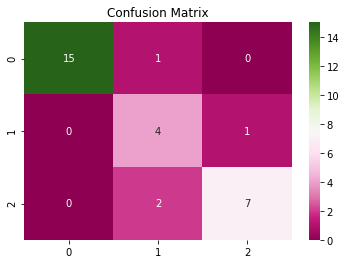

In [339]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [340]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=3)

In [341]:
predictions = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [342]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9333333333333333
Recall    :  0.9333333333333333
Precision :  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


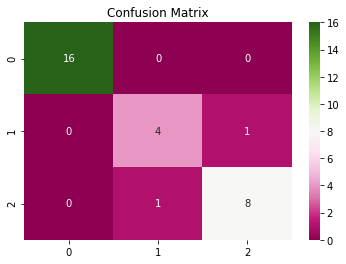

In [343]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [344]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=3)

In [345]:
predictions = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [346]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)


Accuracy  :  0.9666666666666667
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


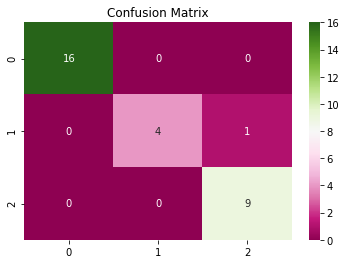

In [347]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

## When K=15


In [348]:
model = KNeighborsClassifier(n_neighbors=15) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [349]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=15)

In [350]:
predictions1 = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [351]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8666666666666667
Recall    :  0.8666666666666667
Precision :  0.874074074074074
Confusion matrix: 
[[21  0  0]
 [ 0  8  2]
 [ 0  4 10]]


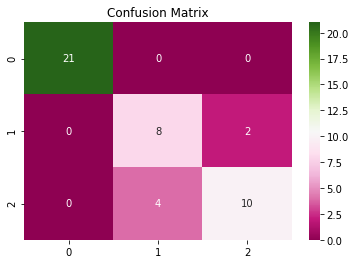

In [352]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [353]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=15)

In [354]:
predictions1 = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [355]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


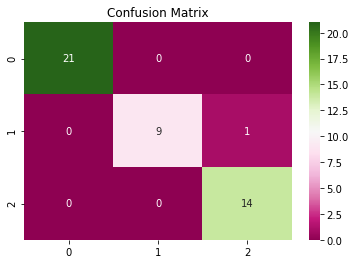

In [356]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [357]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=15)

In [358]:
predictions1 = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [359]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


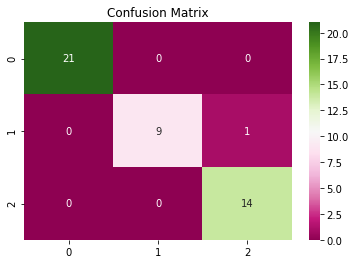

In [360]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [361]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=15)

In [362]:
predictions1 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [363]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8333333333333334
Recall    :  0.8333333333333334
Precision :  0.8416666666666667
Confusion matrix: 
[[16  0  0]
 [ 0  3  2]
 [ 0  3  6]]


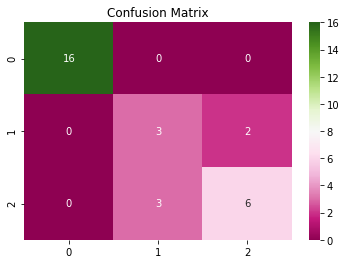

In [364]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [365]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=15)

In [366]:
predictions1 = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [367]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9333333333333333
Recall    :  0.9333333333333333
Precision :  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


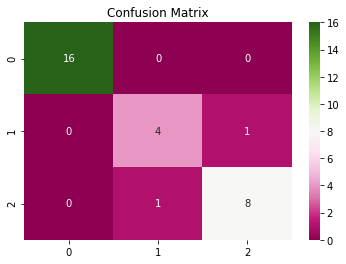

In [368]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [369]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=15)

In [370]:
predictions1 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [371]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)


Accuracy  :  0.9666666666666667
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


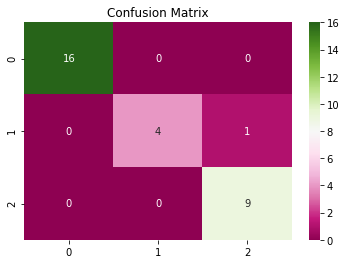

In [372]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

## When K=27
 

In [373]:
model = KNeighborsClassifier(n_neighbors=27) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [374]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=27)

In [375]:
predictions2 = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [376]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8888888888888888
Recall    :  0.8888888888888888
Precision :  0.8915306915306915
Confusion matrix: 
[[21  0  0]
 [ 0  8  2]
 [ 0  3 11]]


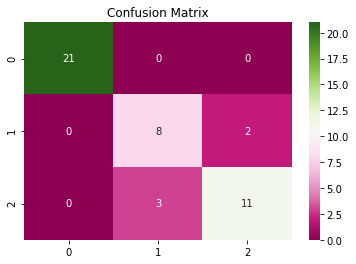

In [377]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [378]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=27)

In [379]:
predictions2 = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [380]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


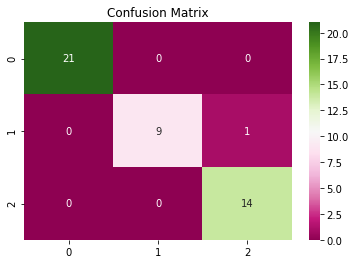

In [381]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [382]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=27)

In [383]:
predictions2 = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [384]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


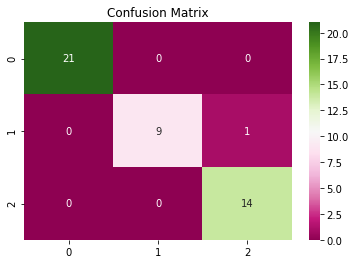

In [385]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [386]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=27)

In [387]:
predictions2 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [388]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9
Recall    :  0.9
Precision :  0.9069444444444444
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  2  7]]


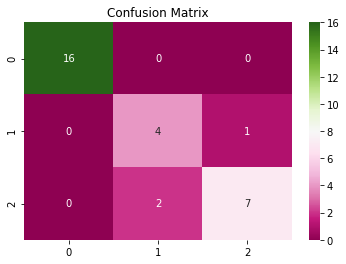

In [389]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [390]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=27)

In [391]:
predictions2 = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [392]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9333333333333333
Recall    :  0.9333333333333333
Precision :  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


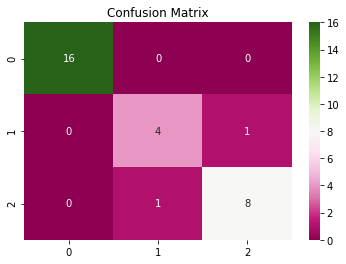

In [393]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [394]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=27)

In [395]:
predictions2 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [396]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9666666666666667
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


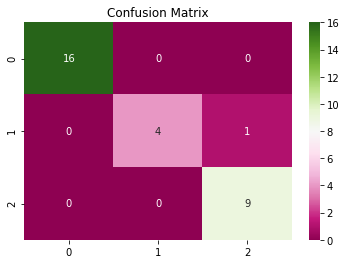

In [397]:
import seaborn as sns
sns.heatmap(confusion,annot=True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.show()

## K=25 is chosen as the optimal K value